In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("diabetes(1).csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
corr = df.corr()

<AxesSubplot:>

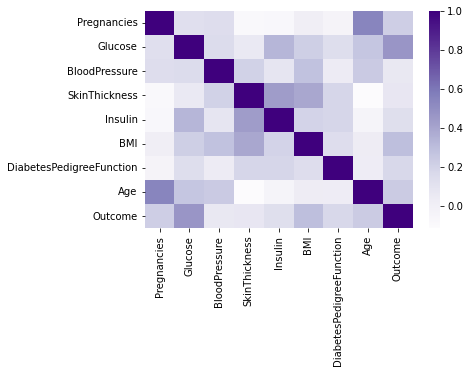

In [5]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap="Purples")

In [6]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap = "Purples", axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

C:\Users\Faiq Hilman\AppData\Local\Temp\ipykernel_30796\1938361647.py:15: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap = "Purples", axis=1)\


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.54,0.22
Glucose,0.13,1.00,0.15,0.06,0.33,0.22,0.14,0.26,0.47
BloodPressure,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.24,0.07
SkinThickness,-0.08,0.06,0.21,1.00,0.44,0.39,0.18,-0.11,0.07
Insulin,-0.07,0.33,0.09,0.44,1.00,0.20,0.19,-0.04,0.13
BMI,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.04,0.29
DiabetesPedigreeFunction,-0.03,0.14,0.04,0.18,0.19,0.14,1.00,0.03,0.17
Age,0.54,0.26,0.24,-0.11,-0.04,0.04,0.03,1.00,0.24
Outcome,0.22,0.47,0.07,0.07,0.13,0.29,0.17,0.24,1.00


In [7]:
numeric_features = df.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print (corr['Outcome'].sort_values(ascending=False)[:9], '\n')

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64 



Text(0.5, 1.0, 'Glucose')

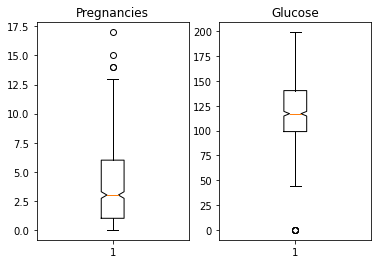

In [8]:
f, (ax1, ax2) = plt.subplots(1,2)
ax1.boxplot(df['Pregnancies'], 20)
ax1.set_title('Pregnancies')
ax2.boxplot(df['Glucose'], 20)
ax2.set_title('Glucose')



Text(0.5, 1.0, 'SkinThickness')

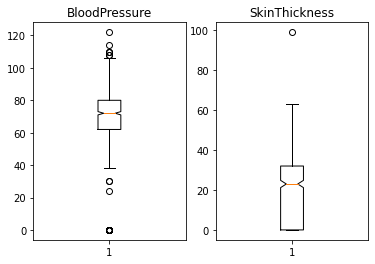

In [9]:
f, (ax3, ax4) = plt.subplots(1,2)
ax3.boxplot(df['BloodPressure'], 20)
ax3.set_title('BloodPressure')
ax4.boxplot(df['SkinThickness'], 20)
ax4.set_title('SkinThickness')


Text(0.5, 1.0, 'BMI')

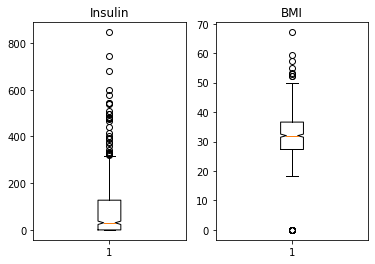

In [10]:
f, (ax5, ax6) = plt.subplots(1,2)
ax5.boxplot(df['Insulin'], 20)
ax5.set_title('Insulin')
ax6.boxplot(df['BMI'], 20)
ax6.set_title('BMI')


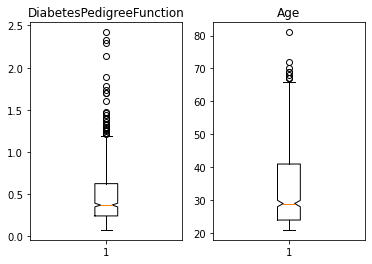

In [11]:
f, (ax7, ax8) = plt.subplots(1,2)
ax7.boxplot(df['DiabetesPedigreeFunction'], 20)
ax7.set_title('DiabetesPedigreeFunction')
ax8.boxplot(df['Age'], 20, )
ax8.set_title('Age')
plt.show()

In [12]:
for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  Pregnancies  is :  111
Count of zeros in column  Glucose  is :  5
Count of zeros in column  BloodPressure  is :  35
Count of zeros in column  SkinThickness  is :  227
Count of zeros in column  Insulin  is :  374
Count of zeros in column  BMI  is :  11
Count of zeros in column  DiabetesPedigreeFunction  is :  0
Count of zeros in column  Age  is :  0
Count of zeros in column  Outcome  is :  500


<AxesSubplot:xlabel='Outcome', ylabel='count'>

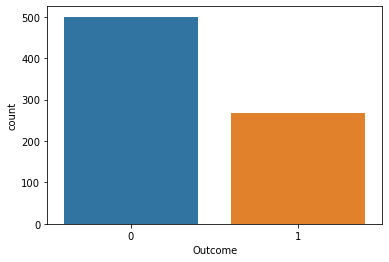

In [13]:
sns.countplot(x=df["Outcome"])

In [14]:
x = df["Glucose"]
y = df["Outcome"]



In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
data = pd.read_csv('diabetes(1).csv')
x = pd.DataFrame(data['Glucose'])
y = data['Outcome']
lr = LogisticRegression()
lr.fit(x,y)
p_pred = lr.predict_proba(x)
y_pred = lr.predict(x)
score_ = lr.score(x,y)
conf_m = confusion_matrix(y,y_pred)
report = classification_report(y,y_pred)


In [17]:
print(score_)
print(conf_m)

0.74609375
[[443  57]
 [138 130]]


<AxesSubplot:>

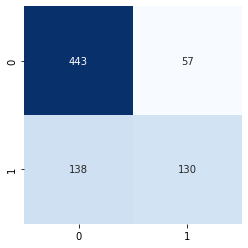

In [18]:
sns.heatmap(conf_m, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

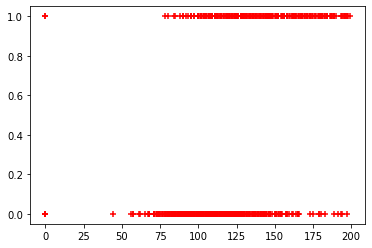

In [19]:
plt.scatter(data.Glucose,data.Outcome, marker = '+', color = 'red')

In [20]:
x=data['Glucose']
y=data['Outcome']

<AxesSubplot:xlabel='Glucose', ylabel='Outcome'>

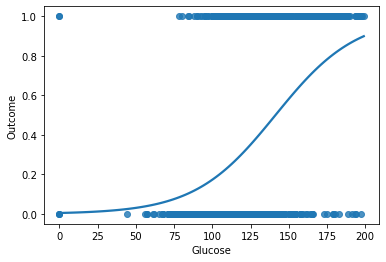

In [21]:
sns.regplot(x=x, y=y, data=data, logistic=True, ci=None)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df[['Glucose']], df.Outcome, train_size=0.9)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
model = LogisticRegression()

In [26]:
model.fit(X_train,y_train)

LogisticRegression()

In [27]:
model.predict(X_test)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [28]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.68571429 0.7826087  0.8115942  0.76811594 0.79710145 0.7826087
 0.71014493 0.72463768 0.69565217 0.73913043]
Average cross-validation score: 0.7497


In [29]:
model.score(X_test,y_test)

0.7402597402597403

In [30]:
model.predict_proba(X_test)

array([[0.73846142, 0.26153858],
       [0.93690164, 0.06309836],
       [0.78721225, 0.21278775],
       [0.78067435, 0.21932565],
       [0.17532278, 0.82467722],
       [0.63986082, 0.36013918],
       [0.66609301, 0.33390699],
       [0.7309376 , 0.2690624 ],
       [0.77399324, 0.22600676],
       [0.18676654, 0.81323346],
       [0.29067146, 0.70932854],
       [0.77399324, 0.22600676],
       [0.88896848, 0.11103152],
       [0.85463538, 0.14536462],
       [0.70756313, 0.29243687],
       [0.45083815, 0.54916185],
       [0.41297175, 0.58702825],
       [0.85463538, 0.14536462],
       [0.63986082, 0.36013918],
       [0.10284559, 0.89715441],
       [0.78721225, 0.21278775],
       [0.76020318, 0.23979682],
       [0.76020318, 0.23979682],
       [0.11403293, 0.88596707],
       [0.57555305, 0.42444695],
       [0.25989119, 0.74010881],
       [0.78067435, 0.21932565],
       [0.7530957 , 0.2469043 ],
       [0.79985802, 0.20014198],
       [0.78067435, 0.21932565],
       [0.

<AxesSubplot:xlabel='Glucose', ylabel='Outcome'>

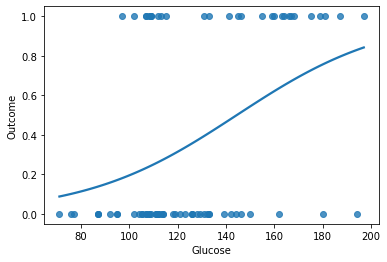

In [31]:
sns.regplot(x=X_test, y=y_test, data=data, logistic=True, ci=None)

In [32]:
X = data.values
# Data Normalization
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
X_std

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.46849198,
         1.4259954 ,  1.36589591],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.36506078,
        -0.19067191, -0.73212021],
       [ 1.23388019,  1.94372388, -0.26394125, ...,  0.60439732,
        -0.10558415,  1.36589591],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.68519336,
        -0.27575966, -0.73212021],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.37110101,
         1.17073215,  1.36589591],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.47378505,
        -0.87137393, -0.73212021]])

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_2d = pca.fit_transform(X_std)

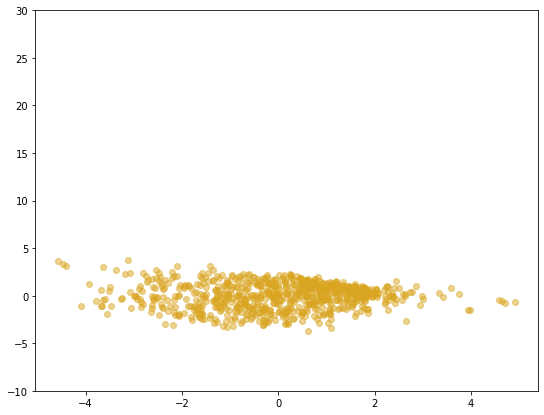

In [34]:


plt.figure(figsize = (9,7))
plt.scatter(x_2d[:,0],x_2d[:,1], c='goldenrod',alpha=0.5)
plt.ylim(-10,30)
plt.show()



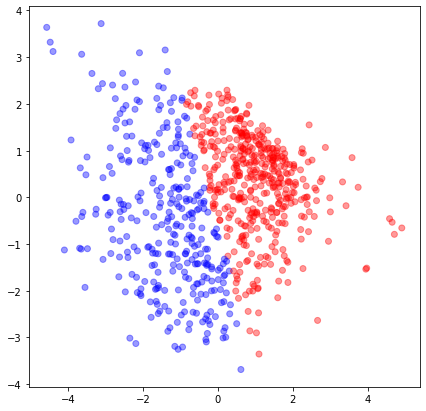

In [35]:


from sklearn.cluster import KMeans
# Set a 3 KMeans clustering
kmeans = KMeans(n_clusters=2)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_2d)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_2d[:,0],x_2d[:,1], c= label_color, alpha=0.4) 
plt.show()



In [36]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [37]:
X = data.drop(['Outcome'], axis=1)

y = data['Outcome']

In [38]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [39]:

X_train.shape, X_test.shape

((614, 8), (154, 8))

In [40]:
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [41]:
from sklearn.metrics import accuracy_score


y_pred_train = gnb.predict(X_train)

y_pred_train



array([1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,

In [42]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7573


In [43]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.72580645 0.70967742 0.75806452 0.77419355 0.68852459 0.85245902
 0.78688525 0.63934426 0.75409836 0.73770492]


In [44]:

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.7427


In [45]:
conf_m = confusion_matrix(y_train,y_pred_train)


<AxesSubplot:>

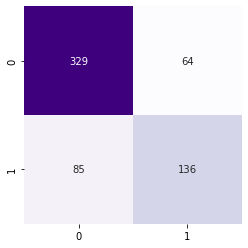

In [47]:
sns.heatmap(conf_m, square=True, annot=True, cmap='Purples', fmt='d', cbar=False)